# Initial Experiments in Machine (No Feature Selection)
In this notebook, I carry out a number of experiments that really just involves throwing things at a AutoML. 
There is no feature selection performed. They are redundant but I have included them as it shows my experimental process.
The legitimate machine learning experiments are performed in the next notebook.


In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret.classification as c
import pycaret.regression as r
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_pickle('../data/all.csv')

In [3]:
sns.set_style('white')
plt.rcParams['axes.spines.right'] = False  # display axis spines
plt.rcParams['axes.spines.top'] = False
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True

## Creating a Diff Dataframe for SleepScore and Fitbit Data

In [4]:
fb_sleep = [col[3:] for col in df.columns if 'FB_' in col]

In [5]:
fb_sleep

['Onset',
 'Offset',
 'TST',
 'WASO',
 'NOA',
 'TIB',
 'REMSD',
 'LSD',
 'DSD',
 'TSDP',
 'AI',
 'SWSP',
 'REMP',
 'SMI',
 'MWD',
 'Midpoint',
 'SleepRegularity']

In [6]:
df_diff = pd.DataFrame()
for col in fb_sleep:
    df_diff[col] = df['SS_' + col] - df['FB_' + col]

In [7]:
df_diff

,Onset,Offset,TST,WASO,NOA,TIB,REMSD,LSD,DSD,TSDP,AI,SWSP,REMP,SMI,MWD,Midpoint,SleepRegularity
0,0.229444,-0.003889,8.0,-22.0,-27.0,7.0,9.0,-63.0,62.0,-14.0,-3.639530,13.275772,1.662908,4.207601,3.696970,-0.116667,NaN
1,0.153889,-0.037778,24.0,-41.0,-23.0,7.0,12.0,-45.0,56.0,-11.5,-3.223593,11.485355,1.598032,6.489447,2.711806,-0.095833,NaN
2,0.121667,0.113333,21.0,-30.0,-22.0,17.0,2.0,-18.0,37.0,-0.5,-3.133662,7.634977,-0.703146,4.406448,2.988095,-0.004167,-0.030522
3,0.434722,0.301389,29.0,-42.0,-25.0,43.0,-22.0,6.0,44.0,-8.0,-3.957906,9.194031,-6.334346,8.185392,5.047619,-0.066667,-0.014052
4,0.057500,0.015833,26.0,-30.0,-14.0,4.0,0.0,-23.0,48.0,-2.5,-2.459091,11.333636,-1.442727,7.094340,0.600000,0.036667,-0.022020
5,0.096389,-0.011944,-5.0,-2.0,-21.0,1.0,-3.0,-16.0,14.0,-6.5,-2.934673,3.588224,-0.458037,0.066031,19.030000,-0.054167,-0.018338
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018338
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017714
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.032724
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.080853


In [8]:
sleep = [col for col in df.columns if 'Onset' in col or 'Offset' in col or 'Date' in col]
df.loc[df_diff.TIB > 150, sleep]

,Date,FB_Onset,FB_Offset,SS_Onset,SS_Offset
41,2022-11-11,26.1,7.866667,23.560278,8.068611


<AxesSubplot: >

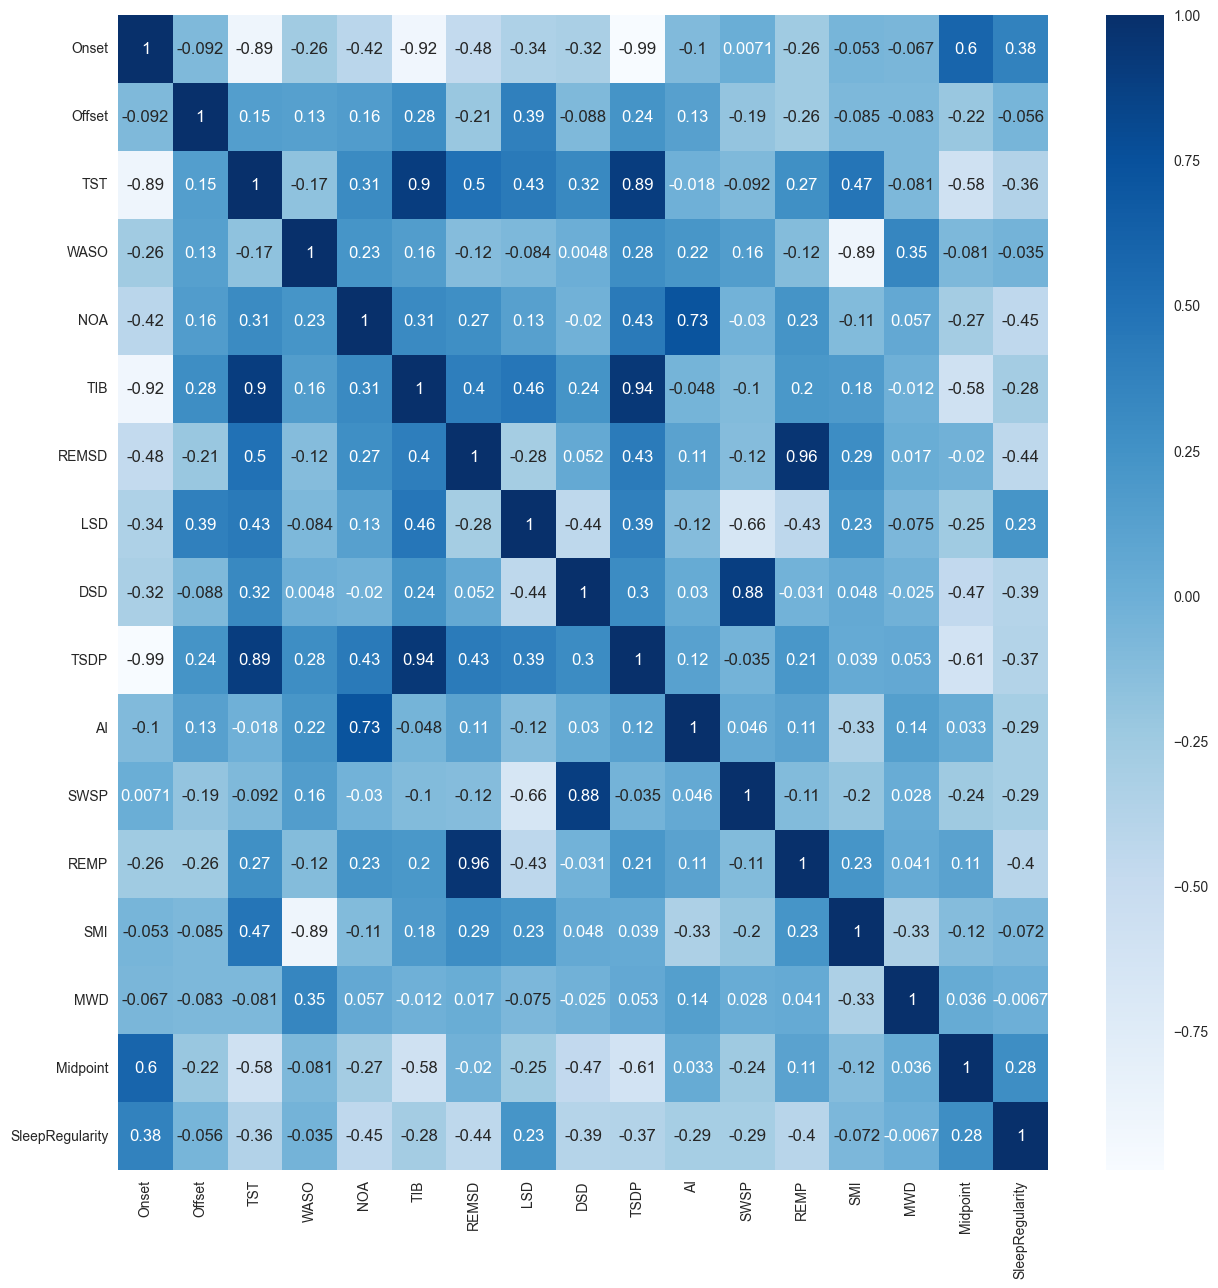

In [9]:
ax, fig = plt.subplots(figsize=(15, 15))
sns.heatmap(df_diff.corr(), annot=True, cmap="Blues")

## Mood Prediction

### All First Time

In [10]:
columns = ['Date', 'Mood_bin_num', 'Time', 'Day',
       'Entertainment', 'Exercise', 'Family', 'Food', 'Friends', 'Hobby',
       'Love', 'Music', 'NightOut', 'Projects', 'School', 'SelfCare', 'Sleep',
       'CaffeineCups', 'AlcoholDrinks', 'Stress', 'Sleepiness',
       'PreviousNightMood', 'StressR7DM',
       'SleepinessR7DM', 'AtHome', 'CaloriesBurned', 'Steps', 'Distance',
       'Floors', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'ActivityCalories',
       'CaloriesBurned_R7DM', 'Steps_R7DM', 'Distance_R7DM', 'Floors_R7DM',
       'SedentaryMinutes_R7DM', 'LightlyActiveMinutes_R7DM',
       'FairlyActiveMinutes_R7DM', 'VeryActiveMinutes_R7DM',
       'ActivityCalories_R7DM', 'FB_Onset', 'FB_Offset', 'FB_TST', 'FB_WASO',
       'FB_NOA', 'FB_TIB', 'FB_REMSD', 'FB_LSD', 'FB_DSD', 'FB_TSDP', 'FB_AI',
       'FB_SWSP', 'FB_REMP', 'FB_SMI', 'FB_Midpoint', 'IsWeekend',
       'FB_SleepRegularity', 'SS_Bedtime', 'SS_SOL', 'SS_TST', 'SS_WASO',
       'SS_Waketime', 'SS_TIB', 'SS_NOA', 'SS_LSD', 'SS_DSD', 'SS_REMSD',
       'SS_ARR', 'SS_SS', 'SS_MS', 'SS_BS', 'SS_SE', 'SS_SMI', 'SS_AI',
       'SS_REMP', 'SS_SWSP', 'SS_Onset', 'SS_Offset', 'SS_TSDP', 'SS_Midpoint',
       'SS_SleepRegularity']

In [11]:
num = ['CaffeineCups', 'AlcoholDrinks', 'Stress', 'Sleepiness',
       'PreviousNightMood', 'StressR7DM',
       'SleepinessR7DM', 'CaloriesBurned', 'Steps', 'Distance',
       'Floors', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'ActivityCalories',
       'CaloriesBurned_R7DM', 'Steps_R7DM', 'Distance_R7DM', 'Floors_R7DM',
       'SedentaryMinutes_R7DM', 'LightlyActiveMinutes_R7DM',
       'FairlyActiveMinutes_R7DM', 'VeryActiveMinutes_R7DM',
       'ActivityCalories_R7DM', 'FB_Onset', 'FB_Offset', 'FB_TST', 'FB_WASO',
       'FB_NOA', 'FB_TIB', 'FB_REMSD', 'FB_LSD', 'FB_DSD', 'FB_TSDP', 'FB_AI',
       'FB_SWSP', 'FB_REMP', 'FB_SMI', 'FB_Midpoint',
       'FB_SleepRegularity', 'SS_Bedtime', 'SS_SOL', 'SS_TST', 'SS_WASO',
       'SS_Waketime', 'SS_TIB', 'SS_NOA', 'SS_LSD', 'SS_DSD', 'SS_REMSD',
       'SS_ARR', 'SS_SS', 'SS_MS', 'SS_BS', 'SS_SE', 'SS_SMI', 'SS_AI',
       'SS_REMP', 'SS_SWSP', 'SS_Onset', 'SS_Offset', 'SS_TSDP', 'SS_Midpoint',
       'SS_SleepRegularity']
bin = ['IsWeekend', 'AtHome', 'Entertainment', 'Exercise', 'Family', 'Food', 'Friends', 'Hobby',
       'Love', 'Music', 'NightOut', 'Projects', 'School', 'SelfCare', 'Sleep']
cat = ['Day']
date = ['Date']

#### Model Development

In [12]:
from pycaret.classification import *
s = c.setup(df[columns].dropna(thresh=len(columns) - 2), 
           target = 'Mood_bin_num', 
           numeric_features=num, 
           date_features=date,
           normalize=True, 
           polynomial_features=True, 
           fix_imbalance=True, session_id=101)

,Description,Value
0,session_id,101
1,Target,Mood_bin_num
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(28, 84)"
5,Missing Values,True
6,Numeric Features,81
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
best_all = c.compare_models(sort='Precision', exclude=['knn'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8000,0.7000,0.9500,0.8500,0.8667,nan,0.5000,0.0700
ridge,Ridge Classifier,0.7500,0.0000,0.8500,0.8000,0.8000,nan,0.4000,0.0090
lr,Logistic Regression,0.7000,0.7000,0.8500,0.7500,0.7667,nan,0.3000,0.5440
svm,SVM - Linear Kernel,0.7500,0.0000,0.7500,0.7000,0.7000,nan,0.4000,0.0110
qda,Quadratic Discriminant Analysis,0.7000,0.6000,0.7000,0.6000,0.6333,nan,0.4000,0.0110
nb,Naive Bayes,0.5500,0.4500,0.6000,0.5000,0.5333,nan,-0.1000,0.0100
ada,Ada Boost Classifier,0.5500,0.6000,0.6500,0.5000,0.5333,nan,0.0000,0.0370
rf,Random Forest Classifier,0.5000,0.7000,0.5500,0.4500,0.4667,0.1000,0.1000,0.0680
dt,Decision Tree Classifier,0.5000,0.4500,0.5500,0.4000,0.4333,0.1000,0.1000,0.0100
gbc,Gradient Boosting Classifier,0.4500,0.3000,0.5500,0.3500,0.4000,0.0000,0.0000,0.0300


In [14]:
tuned_all = c.tune_model(best_all)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,1.0000,1.0000,0.5000,0.6667,0.0000,0.0000
1,0.5000,1.0000,1.0000,0.5000,0.6667,0.0000,0.0000
2,0.5000,0.0000,1.0000,0.5000,0.6667,0.0000,0.0000
3,0.5000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.5000,0.0000,0.5000,1.0000,0.6667,0.0000,0.0000


In [15]:
print(tuned_all)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.3,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=250, n_jobs=-1, oob_score=False,
                     random_state=101, verbose=0, warm_start=False)


In [16]:
c.predict_model(tuned_all)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6667,0.7500,0.6000,0.7500,0.6667,0.3415,0.3500


,Time,Entertainment,Exercise,Family,Food,Friends,Hobby,Love,Music,NightOut,...,Day_Tuesday,Day_Wednesday,Date_month_10,Date_weekday_0,Date_weekday_4,Date_is_month_end_0,Date_is_month_start_0,Mood_bin_num,Label,Score
0,-0.616801,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0,0.5104
1,0.197228,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.5803
2,0.281439,0,1,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,1,0.5219
3,-0.495164,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1,0.5012
4,-0.532591,0,0,0,0,1,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,0.5902
5,0.164480,0,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0.5529
6,0.548103,0,0,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0.5611
7,-0.598088,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.5587
8,0.145767,0,1,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0.5468


In [17]:
model = tuned_all

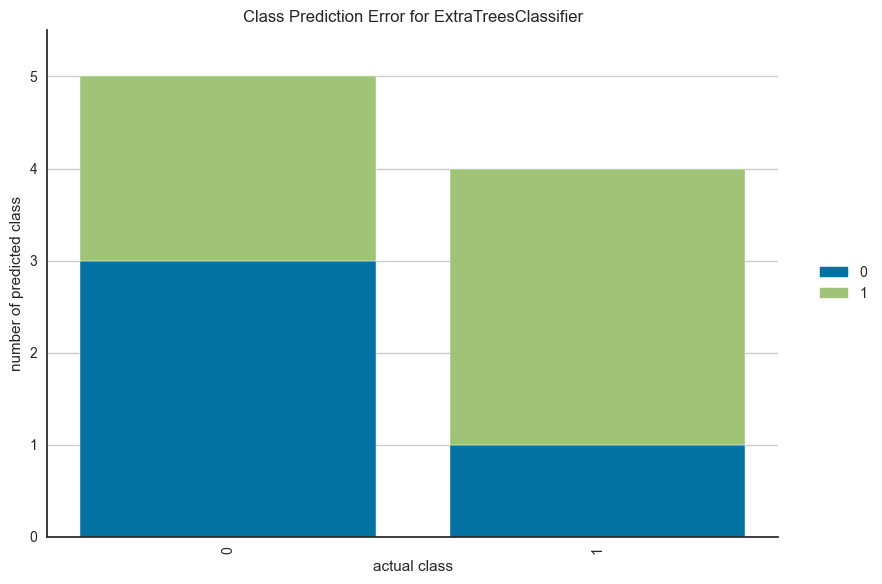

In [18]:
try:
    c.plot_model(estimator=model, plot='error')
except:
    pass

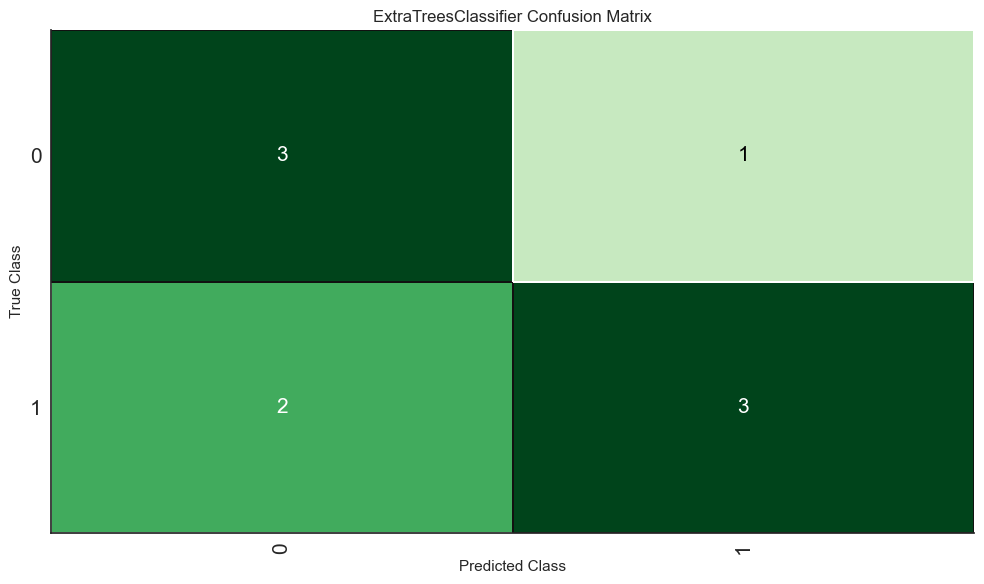

In [19]:
try:
    c.plot_model(tuned_all, plot='confusion_matrix')
except:
    pass

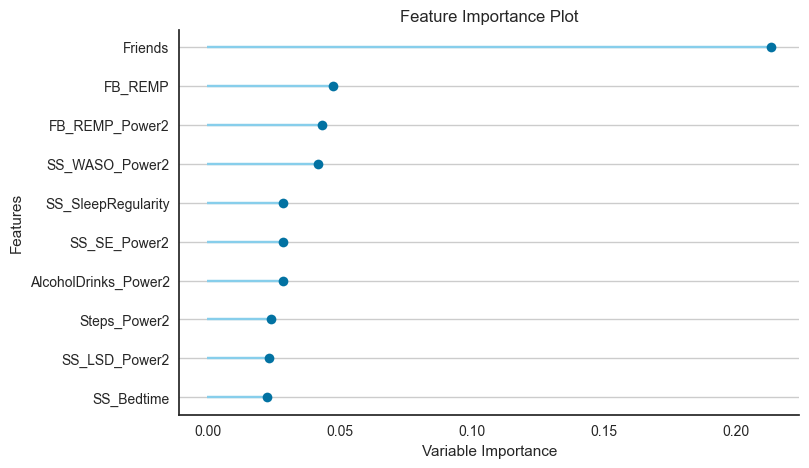

In [20]:
try:
    c.plot_model(tuned_all, plot='feature')
except:
    pass

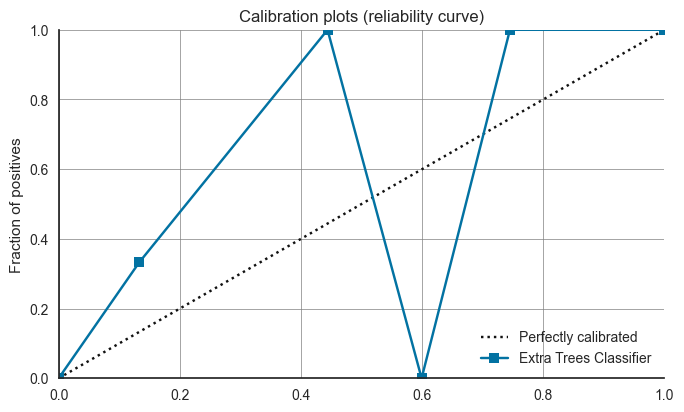

In [21]:
try:
    c.plot_model(estimator=model, plot='calibration')
except:
    pass

### SleepScore

In [22]:
columns = ['Mood_bin_num', 'SS_Bedtime', 'SS_SOL', 'SS_TST', 'SS_WASO',
       'SS_Waketime', 'SS_TIB', 'SS_NOA', 'SS_LSD', 'SS_DSD', 'SS_REMSD',
       'SS_ARR', 'SS_SS', 'SS_MS', 'SS_BS', 'SS_SE', 'SS_SMI', 'SS_AI',
       'SS_REMP', 'SS_SWSP', 'SS_Onset', 'SS_Offset', 'SS_TSDP', 'SS_Midpoint',
       'SS_SleepRegularity']
num =  ['SS_Bedtime', 'SS_SOL', 'SS_TST', 'SS_WASO',
       'SS_Waketime', 'SS_TIB', 'SS_NOA', 'SS_LSD', 'SS_DSD', 'SS_REMSD',
       'SS_ARR', 'SS_SS', 'SS_MS', 'SS_BS', 'SS_SE', 'SS_SMI', 'SS_AI',
       'SS_REMP', 'SS_SWSP', 'SS_Onset', 'SS_Offset', 'SS_TSDP', 'SS_Midpoint',
       'SS_SleepRegularity']

In [23]:
sleepscore = c.setup(df[columns].dropna(thresh=len(columns) - 2), 
                   target = 'Mood_bin_num', 
                   numeric_features=num, 
                   feature_selection=True,
                   normalize=True, 
                   polynomial_features=True, 
                   fix_imbalance=True, 
                     session_id=101)

,Description,Value
0,session_id,101
1,Target,Mood_bin_num
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(42, 25)"
5,Missing Values,True
6,Numeric Features,24
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
best_sleepscore = c.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.7667,0.0000,0.8000,0.7833,0.7767,0.4400,0.4500,0.0080
ada,Ada Boost Classifier,0.7333,0.8500,0.6500,0.7167,0.6633,0.4300,0.4500,0.0330
lr,Logistic Regression,0.7000,0.7000,0.7000,0.6333,0.6433,0.3300,0.3500,0.0080
dt,Decision Tree Classifier,0.7000,0.7250,0.6500,0.7000,0.6500,0.4200,0.4500,0.0070
rf,Random Forest Classifier,0.6667,0.7000,0.7000,0.7333,0.6933,0.2300,0.2500,0.0780
ridge,Ridge Classifier,0.6500,0.0000,0.8000,0.7500,0.7133,0.3100,0.3500,0.0070
lda,Linear Discriminant Analysis,0.6500,0.7250,0.5500,0.5667,0.5300,0.2300,0.2500,0.0080
qda,Quadratic Discriminant Analysis,0.5833,0.5500,1.0000,0.5833,0.7167,0.1000,0.1000,0.0070
et,Extra Trees Classifier,0.4667,0.5500,0.5000,0.5167,0.4967,-0.1200,-0.1500,0.0660
nb,Naive Bayes,0.4500,0.4500,0.5000,0.4333,0.4433,-0.1100,-0.1500,0.0070


In [25]:
print(best_sleepscore)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [26]:
tuned_sleepscore = c.tune_model(best_sleepscore)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.3333,0.0000,0.5000,0.5000,0.5000,-0.5000,-0.5000
4,0.6667,0.0000,1.0000,0.6667,0.8000,0.0000,0.0000
5,0.6667,0.0000,1.0000,0.6667,0.8000,0.0000,0.0000
6,0.6667,0.0000,0.5000,1.0000,0.6667,0.4000,0.5000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.6667,0.0000,0.5000,1.0000,0.6667,0.4000,0.5000


In [27]:
c.predict_model(tuned_sleepscore)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6154,0.6190,0.5714,0.6667,0.6154,0.2353,0.2381


,SS_Onset,SS_LSD_Power2,SS_DSD_Power2,SS_BS,SS_SleepRegularity,SS_Waketime_Power2,SS_AI_Power2,SS_DSD,SS_NOA_Power2,SS_SWSP_Power2,...,SS_REMSD,SS_WASO_Power2,SS_SWSP,SS_TSDP,SS_Midpoint_Power2,SS_MS_Power2,SS_SleepRegularity_Power2,SS_Bedtime,Mood_bin_num,Label
0,-1.233087,0.906322,-0.573908,-0.509995,1.806725e-07,-0.352104,1.704923,-0.525437,2.742149,-1.066916,...,0.703714,0.693690,-1.069207,1.147170,0.315502,1.394740,-0.209719,-1.127792,0,1
1,-0.449292,-0.777898,0.578877,0.776079,3.866335e-01,-0.293289,1.420624,0.675731,1.778586,0.791921,...,0.662319,0.285099,0.814151,0.307727,-0.383241,0.833957,0.162365,-0.206566,0,1
2,2.761644,-2.321591,-0.602267,-0.509995,1.806725e-07,0.056916,1.647070,-0.559756,-0.431942,2.907355,...,-0.952084,0.285099,2.438899,-3.050046,1.935107,-1.350951,-0.209719,2.964879,1,1
3,0.214826,-0.199654,0.046675,0.293801,-8.762318e-01,1.382748,0.407574,0.160945,0.191540,0.684384,...,-1.324639,5.913118,0.720451,0.787409,0.147164,-1.664744,-0.820911,0.476793,0,0
4,0.252262,-0.756166,0.395118,0.615320,3.395826e-01,-0.602837,0.499941,0.504135,0.191540,1.427961,...,-1.117664,-0.106547,1.342615,-0.731584,-0.987321,-1.510299,0.113734,0.375139,1,1
5,-0.298368,0.935744,-0.150182,0.133042,-5.392909e-01,-0.982593,-1.213305,-0.044970,-1.338826,0.035413,...,-1.986958,-0.571626,0.122649,-0.421789,-0.942380,-2.299073,-0.623994,-0.767537,1,0
6,-0.323719,1.453746,-1.092757,-1.313791,2.239949e+00,-0.328869,0.016507,-1.211818,0.191540,-1.518410,...,-0.289765,-0.383335,-1.659513,0.137840,-0.517446,-0.386895,2.816553,-0.515848,1,1
7,-0.288052,0.342352,0.080375,0.293801,5.620307e-01,-0.123603,-1.296732,0.195264,-1.338826,-0.199528,...,0.289765,-0.672048,-0.109725,0.257760,-0.422965,0.618224,0.351836,-0.083603,0,0
8,0.897810,-0.555339,0.541616,0.776079,1.854095e-01,1.198765,-1.234906,0.641412,-1.338826,0.936286,...,-0.165580,-0.272243,0.937834,-0.111995,0.712985,0.201468,-0.039111,1.195862,0,0
9,-0.324308,-0.392615,1.251218,1.258357,3.567982e-01,0.856467,-0.144389,1.259155,0.191540,1.185277,...,0.331160,0.631554,1.145847,1.027250,0.212055,0.100343,0.131420,-0.378199,1,1


In [28]:
model = tuned_sleepscore

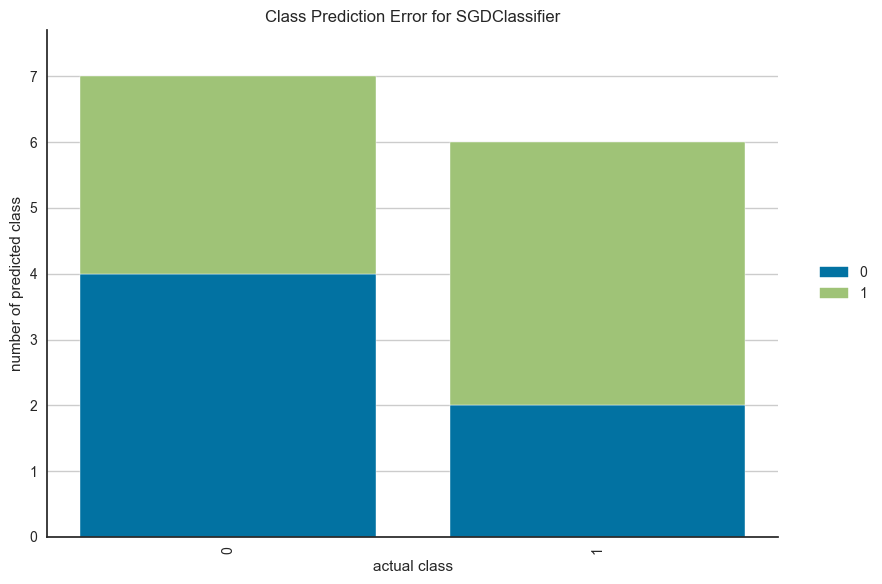

In [29]:
try:
    c.plot_model(estimator=model, plot='error')
except:
    pass

In [30]:
try:
    c.plot_model(tuned_all, plot='confusion_matrix')
except:
    pass

IntProgress(value=0, description='Processing: ', max=5)

<Figure size 1000x600 with 0 Axes>

In [31]:
try:
    c.plot_model(tuned_all, plot='feature')
except:
    pass

IntProgress(value=0, description='Processing: ', max=5)

In [32]:
try:
    c.plot_model(estimator=model, plot='calibration')
except:
    pass

### Fitbit Sleep

In [33]:
columns = ['Mood_bin_num', 'FB_Onset', 'FB_Offset', 'FB_TST', 'FB_WASO',
       'FB_NOA', 'FB_TIB', 'FB_REMSD', 'FB_LSD', 'FB_DSD', 'FB_TSDP', 'FB_AI',
       'FB_SWSP', 'FB_REMP', 'FB_SMI', 'FB_Midpoint',
       'FB_SleepRegularity']
num =  ['FB_Onset', 'FB_Offset', 'FB_TST', 'FB_WASO',
       'FB_NOA', 'FB_TIB', 'FB_REMSD', 'FB_LSD', 'FB_DSD', 'FB_TSDP', 'FB_AI',
       'FB_SWSP', 'FB_REMP', 'FB_SMI', 'FB_Midpoint',
       'FB_SleepRegularity']
date = ['Date']
cat = ['Day']
bin_ = ['IsWeekend']

In [34]:
sleep = c.setup(df[columns].dropna(thresh=len(columns) - 2), 
                   target = 'Mood_bin_num', 
                   numeric_features=num, 
                   normalize=True, 
                   polynomial_features=True, 
                   fix_imbalance=True,
               session_id=101)

,Description,Value
0,session_id,101
1,Target,Mood_bin_num
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(45, 17)"
5,Missing Values,True
6,Numeric Features,16
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
best_sleep = c.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.5833,0.5000,1.0000,0.5833,0.7267,0.0000,0.0000,0.0060
ada,Ada Boost Classifier,0.4667,0.4500,0.5000,0.5167,0.4800,-0.0600,-0.0500,0.0340
svm,SVM - Linear Kernel,0.4333,0.0000,0.4500,0.4167,0.4133,-0.1500,-0.1500,0.0070
lightgbm,Light Gradient Boosting Machine,0.4167,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100
dummy,Dummy Classifier,0.4167,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0060
dt,Decision Tree Classifier,0.4000,0.4250,0.4500,0.3500,0.3833,-0.1500,-0.1500,0.0070
lr,Logistic Regression,0.3917,0.1500,0.4000,0.3667,0.3800,-0.2800,-0.3077,0.0090
knn,K Neighbors Classifier,0.3667,0.3750,0.3500,0.4000,0.3500,-0.2200,-0.2500,0.0100
nb,Naive Bayes,0.3667,0.3500,0.4000,0.3667,0.3633,-0.2500,-0.2500,0.0060
ridge,Ridge Classifier,0.3667,0.0000,0.4000,0.3667,0.3800,-0.3300,-0.3500,0.0060


In [36]:
tuned_sleep = c.tune_model(best_sleep)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
1,0.3333,0.5000,0.5000,0.5000,0.5000,-0.5000,-0.5000
2,0.6667,0.5000,0.5000,1.0000,0.6667,0.4000,0.5000
3,0.3333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6667,0.5000,1.0000,0.6667,0.8000,0.0000,0.0000
5,0.6667,0.0000,1.0000,0.6667,0.8000,0.0000,0.0000
6,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000
7,0.3333,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6667,1.0000,1.0000,0.5000,0.6667,0.4000,0.5000


In [37]:
print(tuned_sleep)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.95,
                              store_covariance=False, tol=0.0001)


In [38]:
model = tuned_sleep

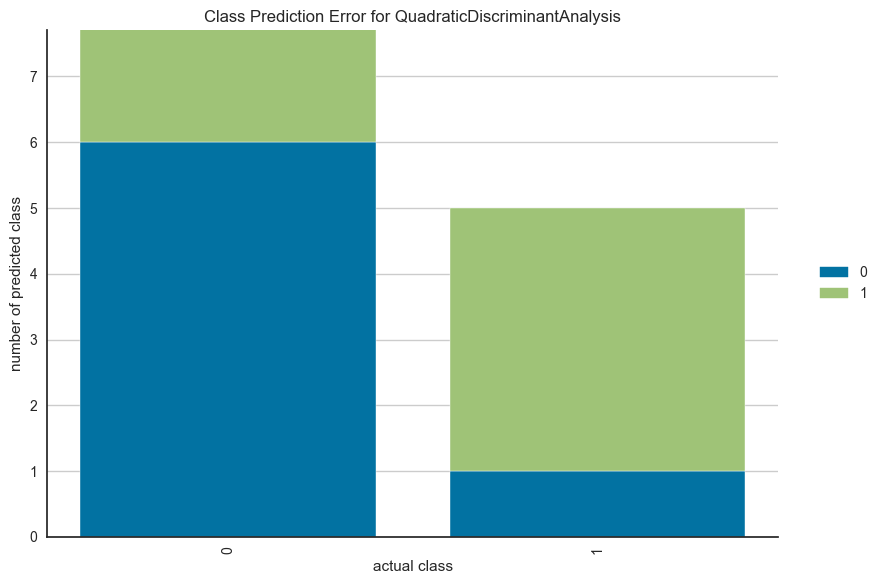

In [39]:
try:
    c.plot_model(estimator=model, plot='error')
except:
    pass

In [40]:
try:
    c.plot_model(tuned_all, plot='confusion_matrix')
except:
    pass

IntProgress(value=0, description='Processing: ', max=5)

<Figure size 1000x600 with 0 Axes>

In [41]:
try:
    c.plot_model(tuned_all, plot='feature')
except:
    pass

IntProgress(value=0, description='Processing: ', max=5)

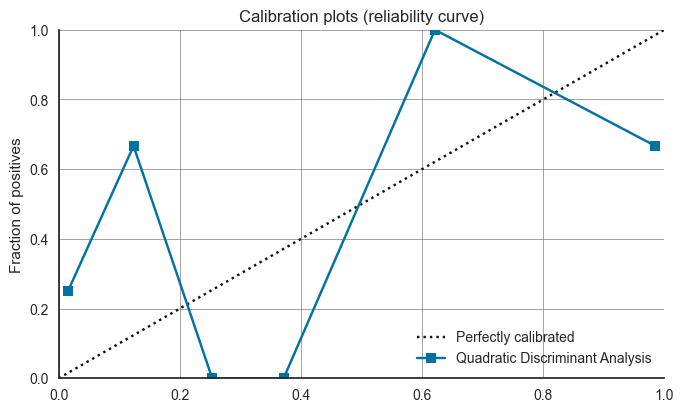

In [42]:
try:
    c.plot_model(estimator=model, plot='calibration')
except:
    pass

### Fitbit Activity

In [43]:
columns = ['Mood_bin_num', 'CaloriesBurned', 'Steps', 'Distance',
       'Floors', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'ActivityCalories',
       'CaloriesBurned_R7DM', 'Steps_R7DM', 'Distance_R7DM', 'Floors_R7DM',
       'SedentaryMinutes_R7DM', 'LightlyActiveMinutes_R7DM',
       'FairlyActiveMinutes_R7DM', 'VeryActiveMinutes_R7DM',
       'ActivityCalories_R7DM']
num =  ['CaloriesBurned', 'Steps', 'Distance',
       'Floors', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'ActivityCalories',
       'CaloriesBurned_R7DM', 'Steps_R7DM', 'Distance_R7DM', 'Floors_R7DM',
       'SedentaryMinutes_R7DM', 'LightlyActiveMinutes_R7DM',
       'FairlyActiveMinutes_R7DM', 'VeryActiveMinutes_R7DM',
       'ActivityCalories_R7DM']

In [44]:
activity = c.setup(df[columns].dropna(thresh=len(columns) - 2), 
                   target = 'Mood_bin_num', 
                   numeric_features=num, 
                   normalize=True, 
                   polynomial_features=True, 
                   fix_imbalance=True,
                  session_id=101)

,Description,Value
0,session_id,101
1,Target,Mood_bin_num
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(50, 19)"
5,Missing Values,False
6,Numeric Features,18
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [45]:
best_activity = c.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6500,0.5000,1.0000,0.6500,0.7848,0.0000,0.0000,0.0070
ada,Ada Boost Classifier,0.5917,0.5333,0.6833,0.6333,0.6433,0.1167,0.1244,0.0320
knn,K Neighbors Classifier,0.5000,0.4667,0.6000,0.6167,0.5800,-0.0600,-0.0667,0.0110
lr,Logistic Regression,0.4750,0.3000,0.6333,0.5750,0.5757,-0.1600,-0.1512,0.0080
lightgbm,Light Gradient Boosting Machine,0.4750,0.6000,0.5500,0.4333,0.4767,0.0400,0.0077,0.0100
dt,Decision Tree Classifier,0.4583,0.3667,0.6833,0.5333,0.5900,-0.2467,-0.2589,0.0070
ridge,Ridge Classifier,0.4583,0.0000,0.6000,0.5667,0.5567,-0.1933,-0.1923,0.0070
lda,Linear Discriminant Analysis,0.4333,0.4875,0.4500,0.5500,0.4600,-0.1433,-0.1500,0.0070
nb,Naive Bayes,0.4250,0.2333,0.5667,0.5833,0.5500,-0.2300,-0.2089,0.0070
rf,Random Forest Classifier,0.4250,0.3667,0.5667,0.5500,0.5300,-0.2100,-0.2089,0.0800


In [46]:
tuned_act = c.tune_model(best_activity)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.7500,0.5000,1.0000,0.6667,0.5000,0.5774
1,0.7500,0.5000,1.0000,0.6667,0.8000,0.5000,0.5774
2,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6000,-1.0000
3,0.5000,1.0000,0.3333,1.0000,0.5000,0.2000,0.3333
4,0.6667,0.0000,1.0000,0.6667,0.8000,0.0000,0.0000
5,0.6667,0.5000,1.0000,0.6667,0.8000,0.0000,0.0000
6,0.6667,0.0000,1.0000,0.6667,0.8000,0.0000,0.0000
7,0.3333,0.5000,0.5000,0.5000,0.5000,-0.5000,-0.5000
8,0.6667,0.0000,1.0000,0.6667,0.8000,0.0000,0.0000


In [47]:
print(tuned_act)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.11,
                              store_covariance=False, tol=0.0001)


In [48]:
model = tuned_act

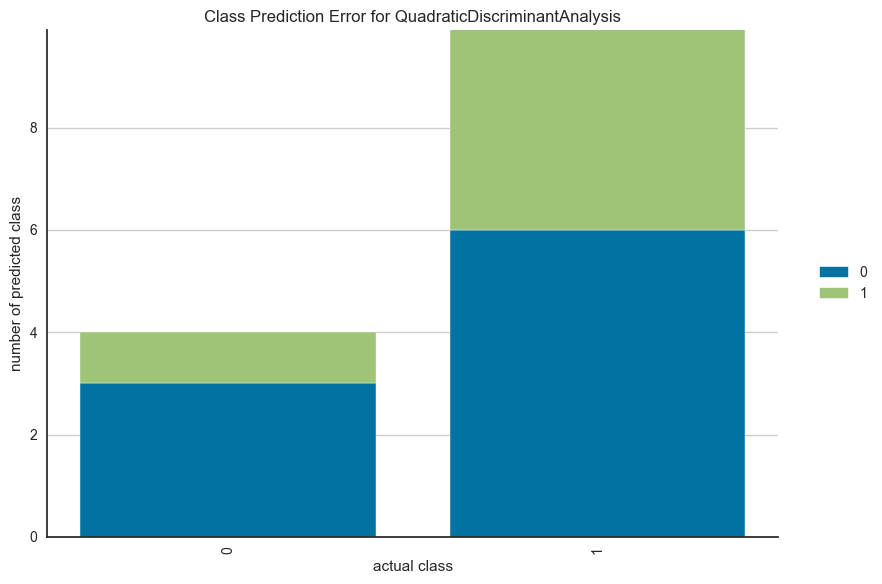

In [49]:
try:
    c.plot_model(estimator=model, plot='error')
except:
    pass

In [50]:
try:
    c.plot_model(tuned_all, plot='confusion_matrix')
except:
    pass

IntProgress(value=0, description='Processing: ', max=5)

<Figure size 1000x600 with 0 Axes>

In [51]:
try:
    c.plot_model(tuned_all, plot='feature')
except:
    pass

IntProgress(value=0, description='Processing: ', max=5)

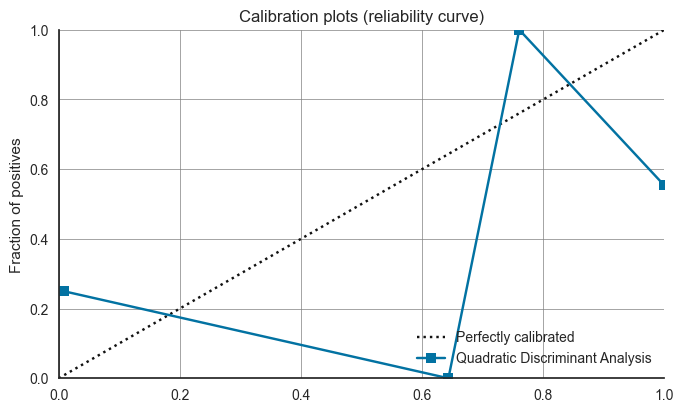

In [52]:
try:
    c.plot_model(estimator=model, plot='calibration')
except:
    pass

### Mood Activity and Sleep Log Data

In [53]:
columns = ['Mood_bin_num', 'Entertainment', 'Exercise', 'Family', 'Food', 'Friends', 'Hobby',
       'Love', 'Music', 'NightOut', 'Projects', 'School', 'SelfCare', 'Sleep',
       'CaffeineCups', 'AlcoholDrinks', 'Stress', 'Sleepiness',
       'PreviousNightMood', 'StressR7DM',
       'SleepinessR7DM', 'AtHome']
num =  ['CaffeineCups', 'AlcoholDrinks', 'Stress', 'Sleepiness',
       'PreviousNightMood', 'StressR7DM',
       'SleepinessR7DM', 'Entertainment', 'Exercise', 'Family', 'Food', 'Friends', 'Hobby',
       'Love', 'Music', 'NightOut', 'Projects', 'School', 'SelfCare', 'Sleep']

In [54]:
log = c.setup(df[columns].dropna(thresh=len(columns) - 2), 
               target = 'Mood_bin_num', 
               numeric_features=num,
               normalize=True, 
               polynomial_features=True, 
               fix_imbalance=True,
             session_id=101)

,Description,Value
0,session_id,101
1,Target,Mood_bin_num
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(42, 22)"
5,Missing Values,True
6,Numeric Features,21
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [55]:
best_mood = c.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9667,1.0000,0.9500,1.0000,0.9667,0.9400,0.9500,0.0670
dt,Decision Tree Classifier,0.9333,0.9250,0.9500,0.9667,0.9467,0.8400,0.8500,0.0070
gbc,Gradient Boosting Classifier,0.9333,0.9750,0.9500,0.9667,0.9467,0.8400,0.8500,0.0230
ada,Ada Boost Classifier,0.9000,1.0000,0.8500,1.0000,0.9000,0.8200,0.8500,0.0310
rf,Random Forest Classifier,0.8667,0.9000,0.9000,0.9000,0.9000,0.7000,0.7000,0.0770
knn,K Neighbors Classifier,0.8500,0.8250,0.9000,0.8167,0.8467,0.7000,0.7000,0.0110
nb,Naive Bayes,0.8167,0.8250,0.8500,0.9167,0.8467,0.6200,0.6500,0.0070
ridge,Ridge Classifier,0.8167,0.0000,0.8000,0.8500,0.8000,0.6800,0.7000,0.0070
lr,Logistic Regression,0.7833,0.9500,0.8000,0.8167,0.7800,0.5800,0.6000,0.0090
svm,SVM - Linear Kernel,0.7500,0.0000,0.7500,0.9167,0.7800,0.5000,0.5500,0.0070


In [56]:
tuned_mood = c.tune_model(best_mood)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000
5,0.6667,0.5000,1.0000,0.6667,0.8000,0.0000,0.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [57]:
print(tuned_mood)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=11, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.002,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=101, verbose=0, warm_start=False)


In [58]:
model = tuned_mood

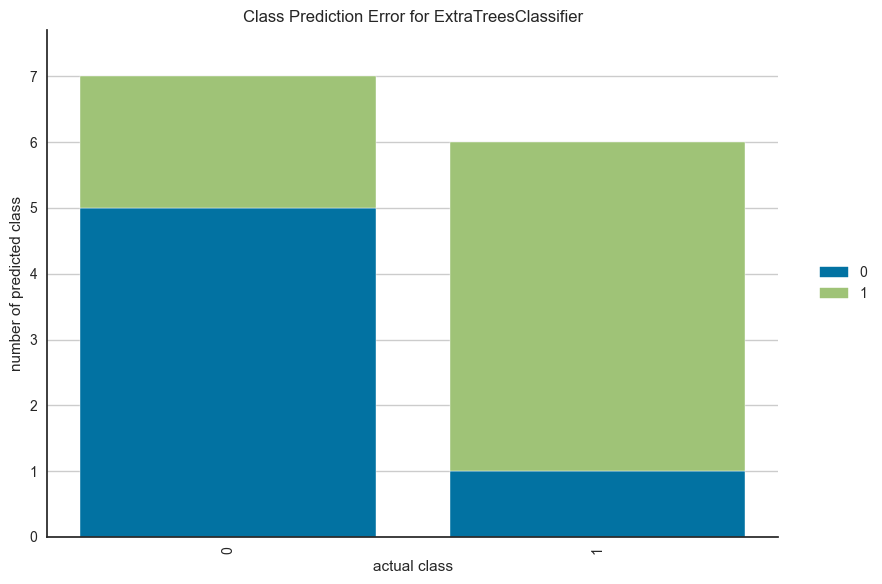

In [59]:
try:
    c.plot_model(estimator=model, plot='error')
except:
    pass

In [60]:
try:
    c.plot_model(tuned_all, plot='confusion_matrix')
except:
    pass

IntProgress(value=0, description='Processing: ', max=5)

<Figure size 1000x600 with 0 Axes>

In [61]:
try:
    c.plot_model(tuned_all, plot='feature')
except:
    pass

IntProgress(value=0, description='Processing: ', max=5)

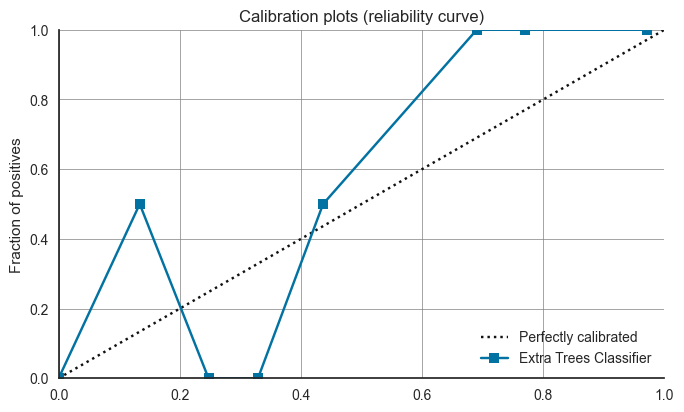

In [62]:
try:
    c.plot_model(estimator=model, plot='calibration')
except:
    pass

## SleepScore Prediction using Fitbit Data
The SleepScore metric is calculated using 4 key variables, total sleep duration, your time taken to fall asleep, your time in light sleep, deep sleep, and REM sleep, and the number and duration of awakenings you have each night.

The fitbit data does not calculated time taken to fall asleep but most of the other sleep variables are available.

### Creating Variables

In [63]:
# Let's calculate the mean wake duration = WASO / number of awakenings
df['SS_MWD'] = df.eval('SS_WASO / SS_NOA')
df['FB_MWD'] = df.eval('FB_WASO / FB_NOA')

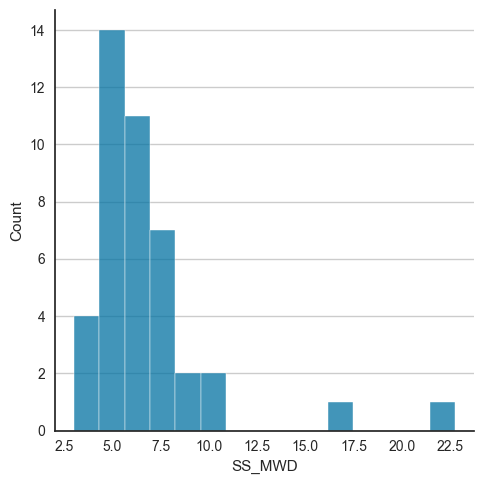

In [64]:
sns.displot(df.SS_MWD)

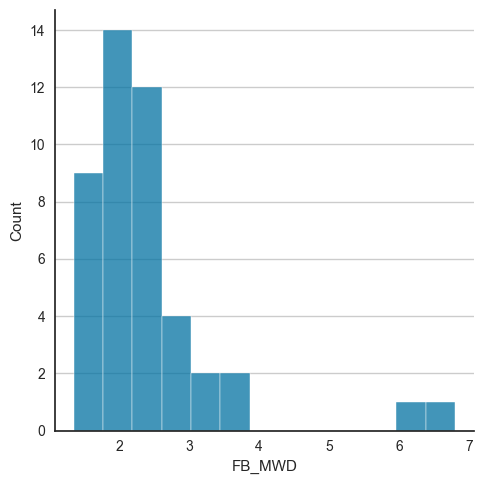

In [65]:
sns.displot(df.FB_MWD)

### Feature Selection

In [66]:
columns = ['SS_SS', 'FB_Onset', 'FB_Offset', 'FB_TST', 'FB_WASO',
       'FB_NOA', 'FB_TIB', 'FB_REMSD', 'FB_LSD', 'FB_DSD', 'FB_TSDP', 'FB_AI',
       'FB_SWSP', 'FB_REMP', 'FB_SMI', 'FB_Midpoint',
       'FB_SleepRegularity']
num =  ['FB_Onset', 'FB_Offset', 'FB_TST', 'FB_WASO',
       'FB_NOA', 'FB_TIB', 'FB_REMSD', 'FB_LSD', 'FB_DSD', 'FB_TSDP', 'FB_AI',
       'FB_SWSP', 'FB_REMP', 'FB_SMI', 'FB_Midpoint',
       'FB_SleepRegularity'] 

In [67]:
threshold = 0.25
corr = abs(df[columns].corr()[['SS_SS']])
corr = corr[corr > threshold].dropna(how='any')

In [68]:
features = corr.index # removing mood_num and mood_bin_num

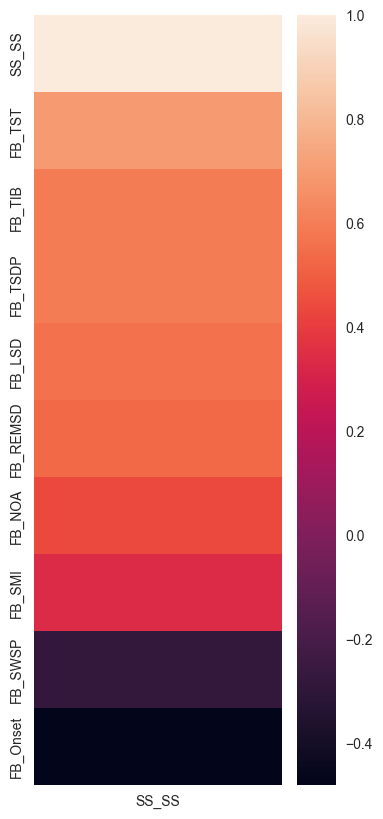

In [69]:
ax, fig = plt.subplots(figsize=(4, 10))
sns.heatmap(df[features].corr()[['SS_SS']].sort_values(by='SS_SS', ascending=False))
plt.savefig('../visuals/SS_Heatmap.png');

In [70]:
df[features].dropna(thresh=len(features) - 3)

,SS_SS,FB_Onset,FB_TST,FB_NOA,FB_TIB,FB_REMSD,FB_LSD,FB_TSDP,FB_SWSP,FB_SMI
0,92.0,23.183333,447.0,33.0,501.0,80.0,277.0,501.0,20.134228,89.221557
1,92.0,22.550000,437.0,32.0,528.0,84.0,297.0,528.0,12.814645,82.765152
2,91.0,22.750000,426.0,28.0,487.0,104.0,264.0,487.0,13.615023,87.474333
3,79.0,23.150000,382.0,28.0,446.0,53.0,247.0,446.0,21.465969,85.650224
4,85.0,24.583333,352.0,20.0,400.0,74.0,208.0,400.0,19.886364,88.000000
5,81.0,22.433333,428.0,25.0,521.0,90.0,236.0,521.0,23.831776,82.149712
11,84.0,22.566667,426.0,29.0,523.0,68.0,250.0,523.0,25.352113,81.453155
12,82.0,22.766667,430.0,27.0,503.0,75.0,266.0,503.0,20.697674,85.487078
14,NaN,24.000000,345.0,25.0,403.0,60.0,222.0,403.0,18.260870,85.607940
15,88.0,23.750000,366.0,32.0,448.0,54.0,229.0,448.0,22.677596,81.696429


### Model Development

In [71]:
ss_fitbit = r.setup(df[features].dropna(thresh=len(features) - 3), 
                   target = 'SS_SS', session_id=101)

,Description,Value
0,session_id,101
1,Target,SS_SS
2,Original Data,"(45, 10)"
3,Missing Values,True
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(25, 8)"


In [72]:
best_ss = r.compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,4.5450,38.1784,5.3984,-1.1032,0.0665,0.0573,0.0140
lasso,Lasso Regression,4.5928,42.8461,5.7098,-1.5677,0.0707,0.0580,0.0070
omp,Orthogonal Matching Pursuit,4.6763,42.0775,5.7156,-1.5990,0.0709,0.0593,0.0060
en,Elastic Net,4.6919,44.0146,5.8169,-1.6567,0.0720,0.0591,0.0070
br,Bayesian Ridge,4.7527,41.9037,5.8249,-1.4984,0.0720,0.0599,0.0060
dummy,Dummy Regressor,4.8391,47.9179,6.0572,-0.5602,0.0738,0.0612,0.0050
llar,Lasso Least Angle Regression,4.9058,48.5643,6.1437,-0.6641,0.0749,0.0620,0.0070
ridge,Ridge Regression,5.2166,49.1873,6.1657,-1.7867,0.0756,0.0651,0.0120
et,Extra Trees Regressor,5.5663,63.2071,6.8343,-1.6613,0.0835,0.0708,0.0650
ada,AdaBoost Regressor,5.6985,60.1364,6.7870,-1.3933,0.0827,0.0721,0.0340


In [73]:
tuned_ss = r.tune_model(best_ss, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.4286,13.1676,3.6287,0.6365,0.0416,0.0400
1,8.5293,156.4207,12.5068,-0.0231,0.1776,0.1373
2,4.6886,26.9974,5.1959,0.1563,0.0590,0.0527
3,5.2697,49.7644,7.0544,-6.9979,0.0837,0.0603
4,2.2965,5.6997,2.3874,0.7242,0.0295,0.0290
5,3.7537,14.0916,3.7539,0.5342,0.0430,0.0436
6,4.8726,38.5688,6.2104,-1.4106,0.0754,0.0627
7,6.6982,51.0922,7.1479,-3.1708,0.0848,0.0782
8,1.5394,3.3414,1.8280,-0.4851,0.0218,0.0182


In [74]:
print(tuned_ss)

HuberRegressor(alpha=0.7, epsilon=1.55, fit_intercept=False, max_iter=100,
               tol=1e-05, warm_start=False)


In [75]:
r.predict_model(tuned_ss)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,3.3034,13.4953,3.6736,0.7058,0.0422,0.0383


,FB_Onset,FB_TST,FB_NOA,FB_REMSD,FB_LSD,FB_TSDP,FB_SWSP,FB_SMI,SS_SS,Label
0,22.549999,437.0,32.0,84.0,297.0,528.0,12.814646,82.765152,92.0,86.109892
1,23.400000,414.0,33.0,65.0,263.0,472.0,20.772947,87.711861,88.0,85.560880
2,23.250000,418.0,33.0,63.0,271.0,489.0,20.095694,85.480576,89.0,84.887351
3,23.566668,422.0,33.0,109.0,203.0,474.0,26.066351,89.029533,93.0,87.316484
4,23.750000,396.0,31.0,83.0,253.0,462.0,15.151515,85.714287,86.0,85.163552
5,23.150000,382.0,28.0,53.0,247.0,446.0,21.465969,85.650223,79.0,81.728915
6,22.416666,480.0,28.0,61.0,338.0,528.0,16.875000,90.909088,94.0,92.362512
7,26.000000,295.0,24.0,43.0,180.0,356.0,24.406780,82.865166,75.0,78.572865
8,26.400000,274.0,18.0,42.0,166.0,306.0,24.087591,89.542480,77.0,79.829432


### Evaluating Model

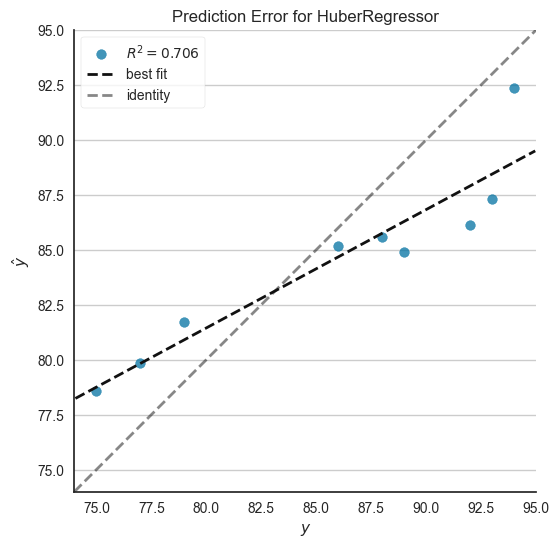

In [76]:
r.plot_model(tuned_ss, plot='error')

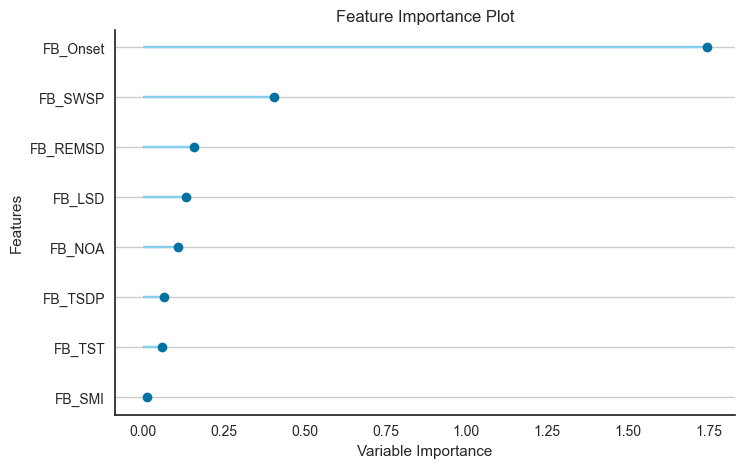

In [77]:
r.plot_model(tuned_ss, plot='feature')

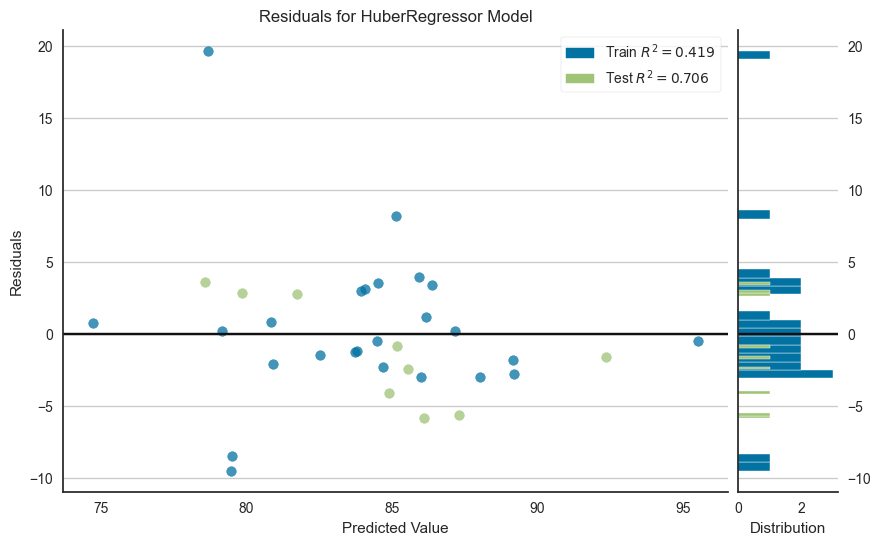

In [78]:
r.plot_model(tuned_ss, plot='residuals')

## Saving Model Evaluation Plots

In [79]:
reg_models = [tuned_ss]
reg_plots = ['error', 'feature', 'residuals']
class_models = [tuned_all, tuned_sleepscore, tuned_sleep, tuned_act, tuned_mood]
class_plots = ['error', 'feature', 'confusion_matrix', 'calibration']
model_dir = {
    tuned_ss: 'fitbit_ss', 
    tuned_all: 'initial_all', 
    tuned_sleepscore: 'sleepscore',
    tuned_sleep: 'sleep',
    tuned_act: 'activity',
    tuned_mood: 'mood_log'
}
for lib, models, plots in [(r, reg_models, reg_plots), (c, class_models, class_plots)]:
    for model in models:
        path = f'../visuals/models/{model_dir[model]}'
        for plot in plots:
            try:
                lib.plot_model(estimator=model, plot=plot, save=path)
            except:
                pass

IntProgress(value=0, description='Processing: ', max=5)

IntProgress(value=0, description='Processing: ', max=5)

IntProgress(value=0, description='Processing: ', max=5)

IntProgress(value=0, description='Processing: ', max=5)